In [1]:
#import the required libraries and packages

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Step 1: Define directory paths
#I extracted the dataset myself and have these directories
train_dir = 'test'       
test_dir = 'train'       
val_dir = 'validation'

In [3]:
# Step 2: Define image parameters
image_size = (224, 224)  # Resize images to 224x224 (adjustable for your model input size)
batch_size = 32          # Batch size for training

In [4]:
# Step 3: Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescaling pixel values to [0,1]
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Step 4: Load the train, validation, and test datasets
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 660 images belonging to 33 classes.
Found 667 images belonging to 33 classes.
Found 2667 images belonging to 33 classes.


In [6]:
# Step 5: Print dataset information
print("\nDataset Loaded Successfully!")
print(f"Number of Training Samples: {train_data.samples}")
print(f"Number of Validation Samples: {val_data.samples}")
print(f"Number of Test Samples: {test_data.samples}")
print(f"Number of Classes: {len(train_data.class_indices)}")
print("Class Indices:", train_data.class_indices)



Dataset Loaded Successfully!
Number of Training Samples: 660
Number of Validation Samples: 667
Number of Test Samples: 2667
Number of Classes: 33
Class Indices: {'Anthomastus Like coral': 0, 'Arborescent Stumpy Grey Branching Erect sponges': 1, 'Arborescent coral': 2, 'Attached Stony coral': 3, 'Bioturbation - Organism tests': 4, 'Bony fishes': 5, 'Colonial Unstalked Ascidian': 6, 'Crab': 7, 'Ctenophores jellies': 8, 'Cup-likes sponges': 9, 'Eels': 10, 'Feather stars': 11, 'Free-living coral': 12, 'General unknown biology': 13, 'Hermit Crab with Shell or Stone': 14, 'Irregular urchins': 15, 'Laminar Erect sponges': 16, 'Octopods': 17, 'Other anemones': 18, 'Prawns - Shrimps - Mysids': 19, 'Quill (Sea pen) coral': 20, 'Sea Cucumber': 21, 'Sea stars': 22, 'Sea urchins': 23, 'Sea whip coral': 24, 'Simple Branching coral': 25, 'Snake stars': 26, 'Squat lobsters': 27, 'Stalked Erect sponges': 28, 'True lobsters': 29, 'Tube anemones': 30, 'Tube worms': 31, 'Woody debris': 32}


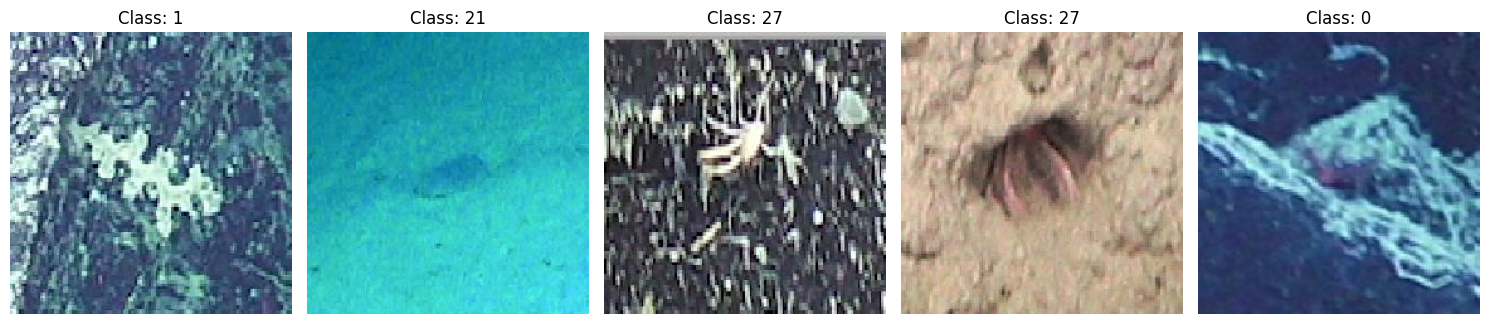

In [7]:
# Step 6: Visualize some sample images from the training set
sample_images, sample_labels = next(train_data)

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for img, ax, label in zip(sample_images[:5], axes, sample_labels[:5]):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Class: {np.argmax(label)}")
plt.tight_layout()
plt.show()